# Week 1: Revisions

**Exercise 0:**

Compute the first 20 Fibonacci numbers. Save the result to a file called Fibonacci.txt

In [1]:
# 1. Compute the first 20 Fibonacci numbers
# We start with the first two numbers: 0 and 1
fib_sequence = [0, 1]

# We already have 2 numbers, so we need to generate 18 more to reach 20
for i in range(18):
    # The next number is the sum of the last two numbers in the list
    next_number = fib_sequence[-1] + fib_sequence[-2]
    fib_sequence.append(next_number)

# 2. Save the result to a file called Fibonacci.txt
filename = "Fibonacci.txt"

with open(filename, "w") as file:
    # Convert the list of numbers to strings so they can be written
    # Option A: Write them as a Python list string (e.g., "[0, 1, 1, ...]")
    file.write(str(fib_sequence))
    
    # Option B: If you prefer them on separate lines, uncomment the lines below:
    # for number in fib_sequence:
    #     file.write(str(number) + "\n")

print(f"Successfully wrote the first {len(fib_sequence)} Fibonacci numbers to {filename}.")

Successfully wrote the first 20 Fibonacci numbers to Fibonacci.txt.


**Exercise 0a:**

Read the result file Fibonacci.txt you created in the last exercise. From that data, plot the ratio of consecutive numbers in the Fibonacci sequence.



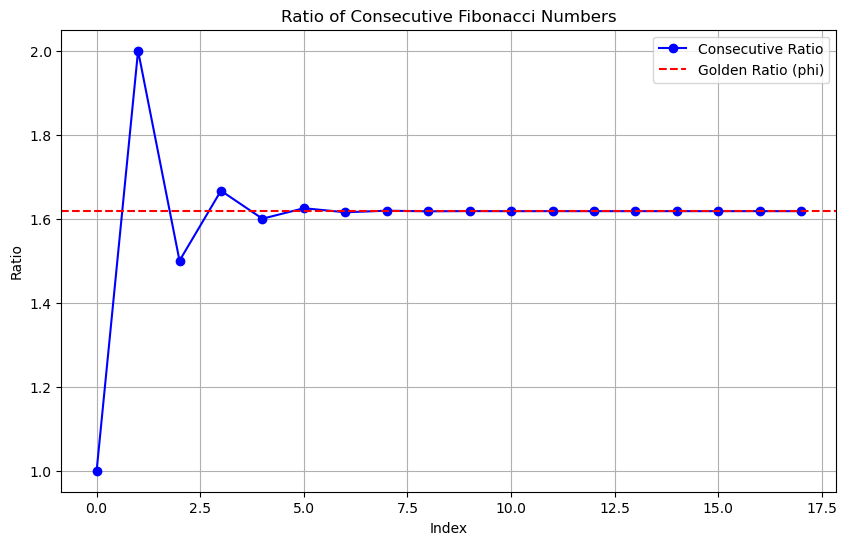

In [2]:
import matplotlib.pyplot as plt

# 1. Read the data from the file
filename = "Fibonacci.txt"

with open(filename, "r") as file:
    data_string = file.read()

# 2. Convert the string back into a list of integers
# We remove the brackets '[' and ']' and split by comma
cleaned_string = data_string.replace('[', '').replace(']', '')
fib_sequence = [int(num) for num in cleaned_string.split(',')]

# 3. Calculate the ratio of consecutive numbers (F_n+1 / F_n)
ratios = []
# We start from index 1 (the second number) to avoid dividing by 0 (since the first number is 0)
for i in range(1, len(fib_sequence) - 1):
    current_num = fib_sequence[i]
    next_num = fib_sequence[i+1]
    
    # Calculate ratio: next / current
    ratio = next_num / current_num
    ratios.append(ratio)

# 4. Plot the result
plt.figure(figsize=(10, 6))
plt.plot(ratios, marker='o', linestyle='-', color='b', label='Consecutive Ratio')

# Optional: Add a line for the Golden Ratio (approx 1.618) to show convergence
plt.axhline(y=1.61803398875, color='r', linestyle='--', label='Golden Ratio (phi)')

plt.title("Ratio of Consecutive Fibonacci Numbers")
plt.xlabel("Index")
plt.ylabel("Ratio")
plt.legend()
plt.grid(True)
plt.show()

Exercise 1: [2] Create two (equal length) arrays x_data and y_data within Python, and then save them to a file data_ex.txt. Remember that you can "stack" two 1-D arrays into a 2-D array with:

c = column_stack([x_data, y_data])
Use x_data values 1, 2, 3, 4, 5. The y_data values should be 1.0, 3.9, 9.0, 16.2, 25.1.

**Exercise 1**

[2] Create two (equal length) arrays x_data and y_data within Python, and then save them to a file data_ex.txt. Remember that you can "stack" two 1-D arrays into a 2-D array with:

c = column_stack([x_data, y_data])
Use x_data values 1, 2, 3, 4, 5. The y_data values should be 1.0, 3.9, 9.0, 16.2, 25.1.

In [3]:
import numpy as np

# 1. Create the two arrays
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([1.0, 3.9, 9.0, 16.2, 25.1])

# 2. Stack the 1-D arrays into a 2-D array
# This creates a structure where x and y are side-by-side columns
c = np.column_stack([x_data, y_data])

# 3. Save the data to a text file
# 'fmt' specifies the format (e.g., %.1f for one decimal place)
np.savetxt('data_ex.txt', c, fmt='%.1f', header='x_data y_data')

print("File 'data_ex.txt' has been created successfully.")

File 'data_ex.txt' has been created successfully.


**Exercise 2:**

4] Read in the data file data_ex.txt created in Exercise 1 and plot a graph of the data as red points. (To access the file, you can download it to your computer from Exercise_1, and upload it on this notebook with the left-hand side menu). On the same graph plot the function  as a blue line.

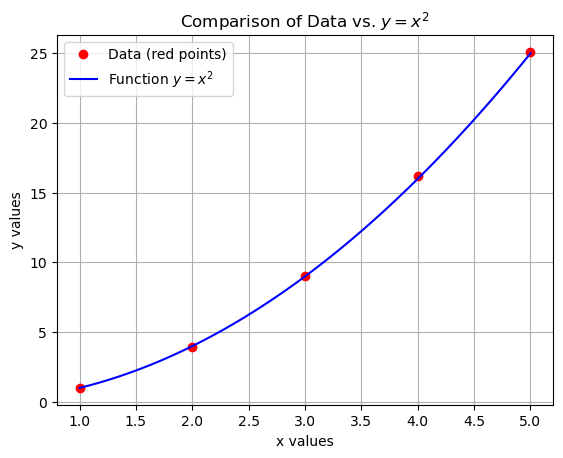

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Read the data file
# unpack=True allows us to assign the two columns directly to x and y variables
x_read, y_read = np.loadtxt('data_ex.txt', unpack=True)

# 2. Plot the data from the file as RED POINTS
# 'ro' stands for (r)ed (o) circles.
plt.plot(x_read, y_read, 'ro', label='Data (red points)')

# 3. Plot the function y = x^2 as a BLUE LINE
# We create a dense array of x values (e.g., 100 points) to make the line look smooth
x_smooth = np.linspace(1, 5, 100)
y_smooth = x_smooth**2

# 'b-' stands for (b)lue solid (-) line
plt.plot(x_smooth, y_smooth, 'b-', label='Function $y=x^2$')

# 4. Add labels and legend for clarity
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.title('Comparison of Data vs. $y=x^2$')
plt.grid(True)

# Show the plot
plt.show()



**Exercise 3:**

[2] Plot the 2-D function z = sin(x)sin(y-1) using imshow() (x,y and z are unrelated to the previous questions). Use mgrid or ogrid to create a 2D data array. (Set the origin to the lower left corner.)


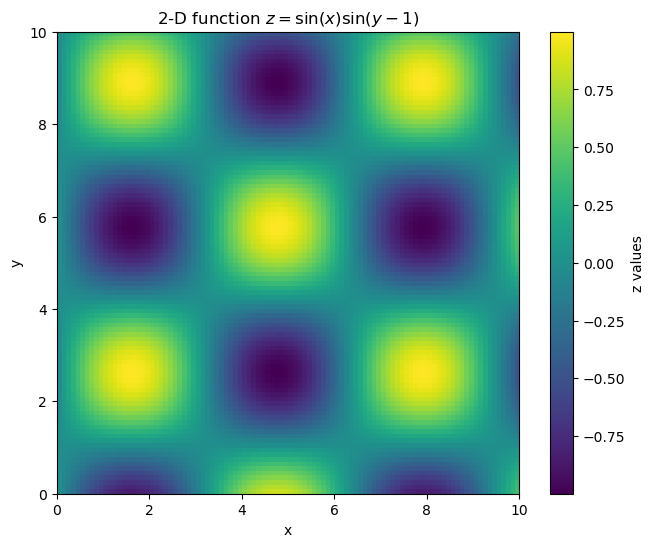

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a coordinate grid using mgrid
# We'll create a range for x and y.
# For example, let's go from 0 to 10 with a step size of 0.1
# y, x are returned in that order by mgrid when using slice notation
y, x = np.mgrid[0:10:0.1, 0:10:0.1]

# 2. Calculate the z values based on the formula: z = sin(x)sin(y-1)
z = np.sin(x) * np.sin(y - 1)

# 3. Plot using imshow
plt.figure(figsize=(8, 6))

# origin='lower' puts the (0,0) index at the bottom-left corner
# extent sets the axis labels to match the actual x and y values rather than pixel indices
plt.imshow(z, origin='lower', extent=[0, 10, 0, 10])

# Add a colorbar to show what values the colors represent
plt.colorbar(label='z values')

# Add labels
plt.title(r'2-D function $z = \sin(x)\sin(y-1)$')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

 # Week 2: Functions

**Exercise 0**

[0] Write a function convert(angle) to convert angles in degrees to radians. Write another function recenter(angle) to wrap angles in radian into the (-pi, pi]  interval. Save those two functions into a file named anglesutils.py.

A centrifuge's loading position at t = 0s is 45 degrees, and start accelerating at a = 2 degrees per seconds squared. So it's position in degrees is given as a function of time (in seconds) by:

 position(t) = 45 + (1/2)(2)(t^2)

Use the anglesutils module you just created to plot that function from t = 0s to t = 30s in radian in the  interval.


In [18]:
%%writefile anglesutils.py

import numpy as np

def convert(angle):
    """
    Converts angles from degrees to radians.
    """
    return angle * (np.pi / 180.0)

def recenter(angle):
    """
    Wraps angles in radians into the (-pi, pi] interval.
    Using the formula: (x + pi) % (2*pi) - pi
    """
    return (angle + np.pi) % (2 * np.pi) - np.pi

Writing anglesutils.py


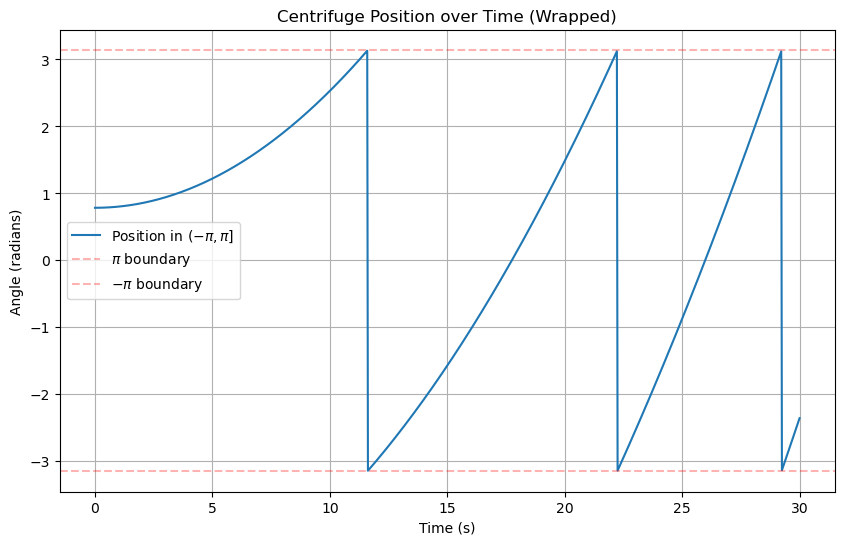

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import anglesutils as au  # Importing the module we created above

# 1. Define the time range
# Creating 1000 points between 0 and 30 for a smooth curve
t = np.linspace(0, 30, 1000)

# 2. Calculate position in degrees using the simplified formula: 45 + t^2
# (The 1/2 and 2 cancel each other out)
pos_degrees = 45 + t**2

# 3. Convert degrees to radians using our module
pos_radians = au.convert(pos_degrees)

# 4. Recenter the angles to the (-pi, pi] interval using our module
pos_recentered = au.recenter(pos_radians)

# 5. Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, pos_recentered, label=r'Position in $(-\pi, \pi]$')

# Adding formatting for clarity
plt.title("Centrifuge Position over Time (Wrapped)")
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.axhline(y=np.pi, color='r', linestyle='--', alpha=0.3, label=r'$\pi$ boundary')
plt.axhline(y=-np.pi, color='r', linestyle='--', alpha=0.3, label=r'$-\pi$ boundary')
plt.grid(True)
plt.legend()

plt.show()

**Exercise 1:**

[4] Define a function func1(time,amplitude,frequency,phase) which returns a sine wave (as a function of time) of chosen amplitude, frequency and phase. Test it out with different amplitude, frequency and phase values by plotting suitable graphs. Set the default values for ampliture, frequency and phase to be 1, 1 and 0, respectively.

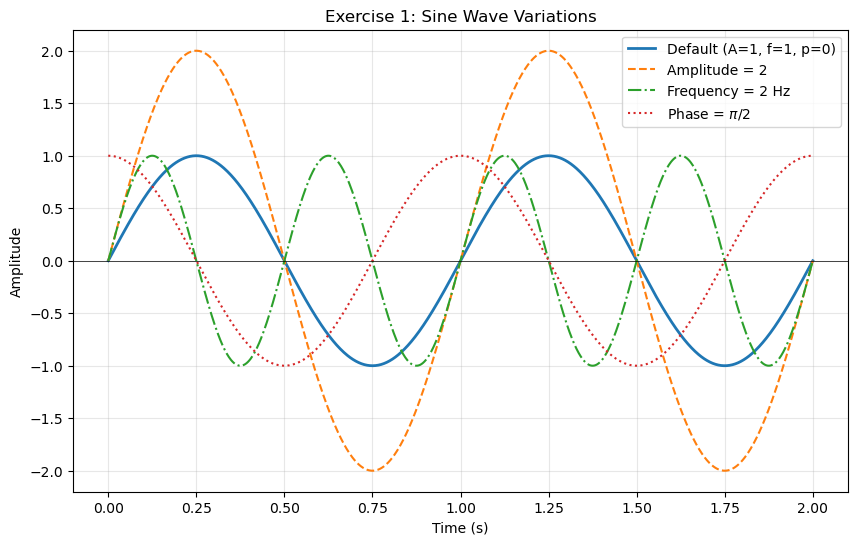

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the function with default values
def func1(time, amplitude=1, frequency=1, phase=0):
    """
    Returns a sine wave as a function of time.
    Formula: y = A * sin(2 * pi * f * t + phase)
    """
    # We use 2*pi*frequency to convert Hz to angular frequency
    return amplitude * np.sin(2 * np.pi * frequency * time + phase)

# 2. Setup the Time Domain
# Create an array of time values from 0 to 2 seconds
t = np.linspace(0, 2, 1000) 

# 3. Test with different values
# Case A: Default values (Amp=1, Freq=1, Phase=0)
y_default = func1(t)

# Case B: Different Amplitude (Amp=2, others default)
y_amplitude = func1(t, amplitude=2)

# Case C: Different Frequency (Freq=2, others default)
y_frequency = func1(t, frequency=2)

# Case D: Different Phase (Phase=pi/2, others default)
# pi/2 radians is a 90-degree shift (cosine wave)
y_phase = func1(t, phase=np.pi/2)

# 4. Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(t, y_default, label='Default (A=1, f=1, p=0)', linewidth=2)
plt.plot(t, y_amplitude, label='Amplitude = 2', linestyle='--')
plt.plot(t, y_frequency, label='Frequency = 2 Hz', linestyle='-.')
plt.plot(t, y_phase, label='Phase = $\pi/2$', linestyle=':')

plt.title('Exercise 1: Sine Wave Variations')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5) # Zero line for reference
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

**Exercise 2:**

A satellite has a circular orbit around the Earth with a period T .

[2] Prove that its altitude h above the Earth‘s surface is (M is Earth’s mass and R its radius):

h=(((GMT^2)/4pi^2)^1/3) - R
 
[2] Write a function to evaluate h.
[2] Write a program that requests user input of T and then prints out the altitude in kilometre
[2] Hence find the altitudes of satellites that orbit the Earth once a day (‘geosynchronous’ orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?

In [21]:
import math

def calculate_altitude(T):
    """
    Calculates the altitude of a satellite given its period T.
    
    Args:
        T (float): Period in seconds.
        
    Returns:
        float: Altitude h in meters.
    """
    # Constants
    G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
    M = 5.972e24     # Mass of Earth (kg)
    R = 6.371e6      # Radius of Earth (m)
    
    # Calculate orbital radius (r) derived from Kepler's 3rd Law
    # r^3 = (G * M * T^2) / (4 * pi^2)
    numerator = G * M * (T ** 2)
    denominator = 4 * (math.pi ** 2)
    r = (numerator / denominator) ** (1/3)
    
    # Calculate altitude (h = r - R)
    h = r - R
    
    return h

def main():
    print("--- Satellite Altitude Calculator ---")
    try:
        # Request user input
        T_input = float(input("Enter the orbital period T (in seconds): "))
        
        if T_input <= 0:
            print("Period must be a positive number.")
            return

        # Calculate altitude in meters
        h_meters = calculate_altitude(T_input)
        
        # Convert to kilometers
        h_km = h_meters / 1000
        
        print(f"The altitude of the satellite is: {h_km:.2f} km")
        
    except ValueError:
        print("Invalid input. Please enter a numeric value for the period.")

if __name__ == "__main__":
    main()

--- Satellite Altitude Calculator ---


Enter the orbital period T (in seconds):  45


The altitude of the satellite is: -6097.56 km


 # Week 3: Uncertainties

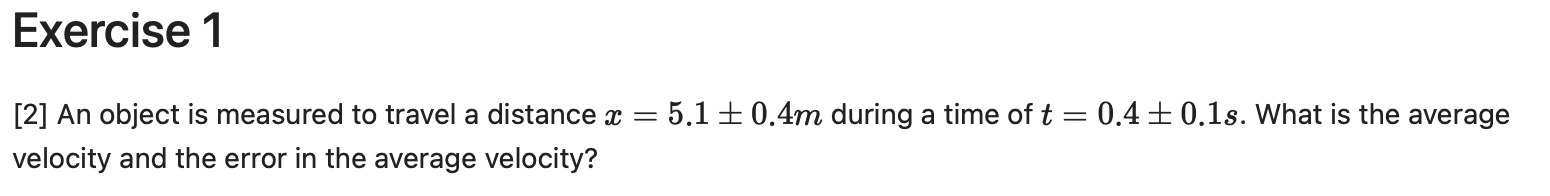

In [2]:
import numpy as np
import matplotlib.pyplot as plt


! pip install -q uncertainties
import uncertainties as uc
import uncertainties.umath as um # for maths functions

# 1. Define your variables with their uncertainties
# ufloat(nominal_value, standard_deviation)
x = uc.ufloat(5.1, 0.4)  # Distance in meters
t = uc.ufloat(0.4, 0.1)  # Time in seconds

# 2. Calculate the average velocity
# The library automatically propagates the error during division
v = x / t

# 3. Print the result
print(f"Average velocity: {v} m/s")

# Optional: If you need the specific values separately for a report:
print(f"Nominal value: {v.n}")
print(f"Standard deviation: {v.s}")

Average velocity: 12.7+/-3.3 m/s
Nominal value: 12.749999999999998
Standard deviation: 3.3406820037231912


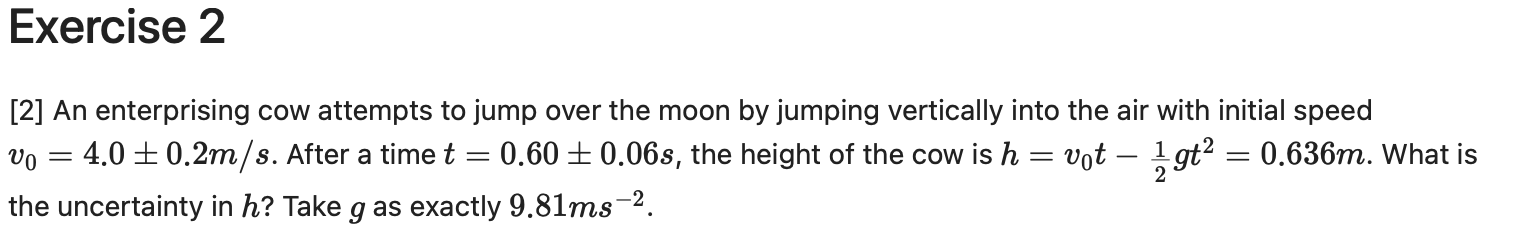

In [3]:
# 1. Define variables
# v0 = 4.0 +/- 0.2
v0 = uc.ufloat(4.0, 0.2)

# t = 0.60 +/- 0.06
t = uc.ufloat(0.60, 0.06)

# g is exact, so it's just a regular number
g = 9.81 

# 2. Calculate height
# The library handles the fact that 't' appears twice!
h = v0 * t - 0.5 * g * t**2

# 3. Print the result
print(f"Height: {h} m")

# To see just the uncertainty explicitly:
print(f"Uncertainty in height: {h.s} m")

Height: 0.63+/-0.16 m
Uncertainty in height: 0.1649399454346945 m


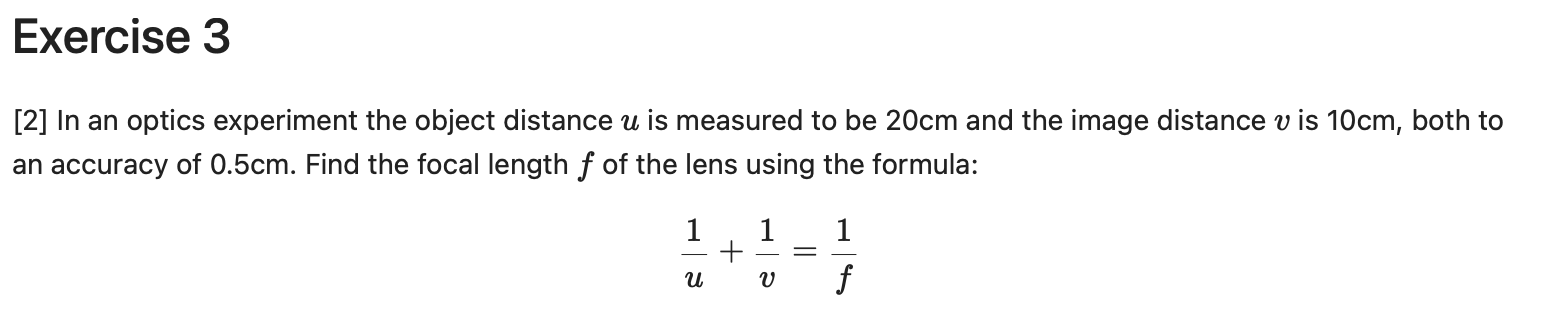

In [4]:
# 1. Define the variables
# u = 20 +/- 0.5 cm
u = uc.ufloat(20, 0.5)

# v = 10 +/- 0.5 cm
v_image = uc.ufloat(10, 0.5) # I named this v_image to avoid confusion with velocity

# 2. Calculate focal length f
# Method A: Direct translation of the formula 1/u + 1/v = 1/f
inv_f = (1/u) + (1/v_image)
f = 1/inv_f

# Method B: Using the rearranged algebraic form (gives the same result)
# f = (u * v_image) / (u + v_image)

# 3. Print the result
print(f"Focal length f: {f} cm")
print(f"Uncertainty in f: {f.s} cm")

Focal length f: 6.67+/-0.23 cm
Uncertainty in f: 0.22906142364542556 cm


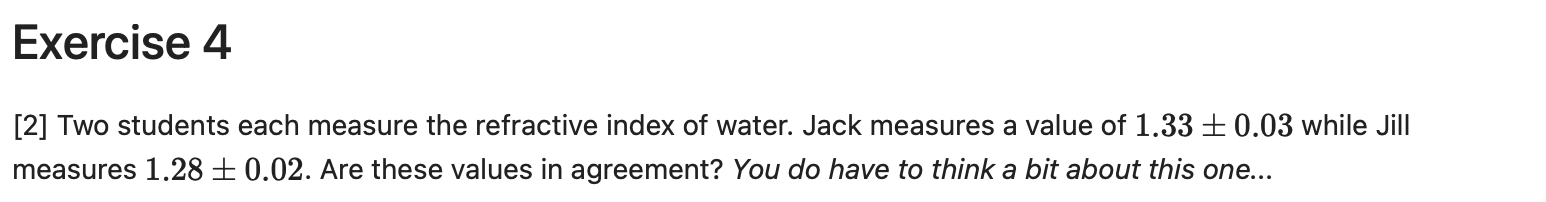

In [5]:
# 1. Define the measurements
n_jack = uc.ufloat(1.33, 0.03)
n_jill = uc.ufloat(1.28, 0.02)

# 2. Calculate the difference
# If they agree, this difference should be compatible with zero.
diff = n_jack - n_jill

# 3. Calculate the "sigma discrepancy" (Z-score)
# How many standard deviations away from zero is the difference?
sigma_difference = abs(diff.n) / diff.s

print(f"Difference: {diff}")
print(f"Separation in sigmas: {sigma_difference:.2f}σ")

Difference: 0.05+/-0.04
Separation in sigmas: 1.39σ


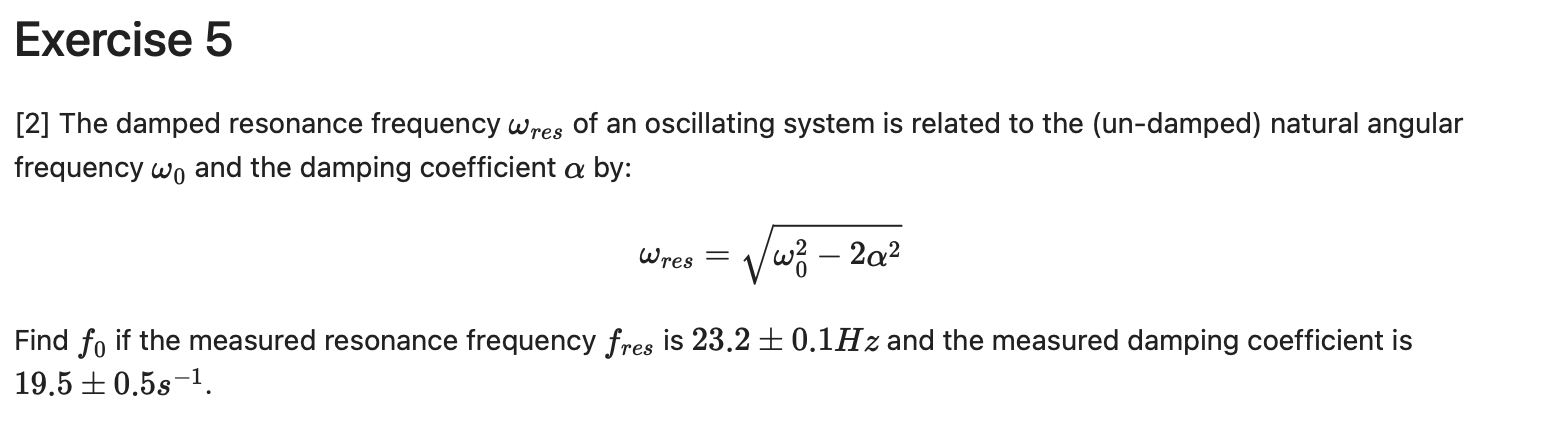

In [6]:
import numpy as np # Needed for pi

# 1. Define variables
f_res = uc.ufloat(23.2, 0.1)   # Measured resonance frequency
alpha = uc.ufloat(19.5, 0.5)   # Damping coefficient

# 2. Convert f to omega (angular frequency)
# omega = 2 * pi * f
omega_res = 2 * np.pi * f_res

# 3. Calculate omega_0
# We use um.sqrt because we are taking the root of a ufloat
# Formula: omega_0 = sqrt(omega_res^2 + 2*alpha^2)
omega_0 = um.sqrt(omega_res**2 + 2 * alpha**2)

# 4. Convert back to f_0
f_0 = omega_0 / (2 * np.pi)

print(f"Natural frequency f0: {f_0} Hz")
print(f"Uncertainty: {f_0.s} Hz")

Natural frequency f0: 23.61+/-0.10 Hz
Uncertainty: 0.10045939540089985 Hz


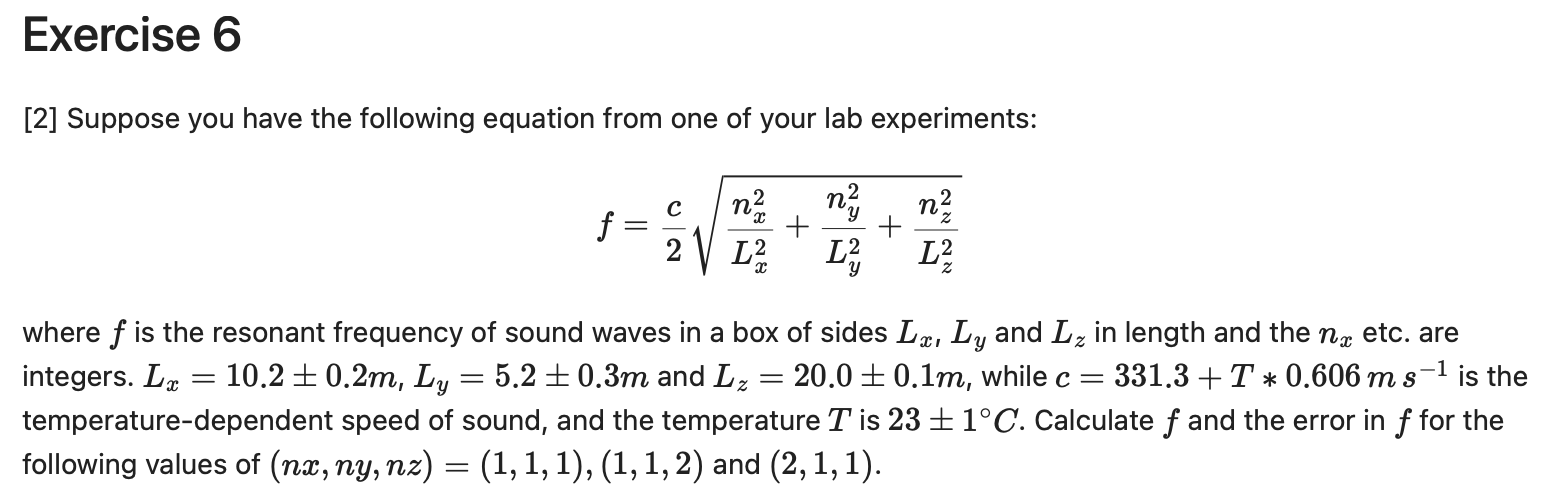

In [7]:
# 1. Define the uncertain variables
Lx = uc.ufloat(10.2, 0.2)
Ly = uc.ufloat(5.2, 0.3)
Lz = uc.ufloat(20.0, 0.1)
T = uc.ufloat(23, 1)  # Temperature in Celsius

# 2. Calculate the speed of sound c
# The uncertainty in T propagates into c
c = 331.3 + T * 0.606

print(f"Speed of sound c: {c} m/s\n")

# 3. Define the cases for (nx, ny, nz)
cases = [
    (1, 1, 1),
    (1, 1, 2),
    (2, 1, 1)
]

# 4. Loop through each case and calculate frequency
for n_x, n_y, n_z in cases:
    # We use um.sqrt because the term inside contains ufloats
    term_x = (n_x**2) / (Lx**2)
    term_y = (n_y**2) / (Ly**2)
    term_z = (n_z**2) / (Lz**2)
    
    # Apply the full formula
    f = (c / 2) * um.sqrt(term_x + term_y + term_z)
    
    print(f"For n=({n_x}, {n_y}, {n_z}): Frequency f = {f} Hz")

Speed of sound c: 345.2+/-0.6 m/s

For n=(1, 1, 1): Frequency f = 38.2+/-1.7 Hz
For n=(1, 1, 2): Frequency f = 41.1+/-1.6 Hz
For n=(2, 1, 1): Frequency f = 48.2+/-1.4 Hz


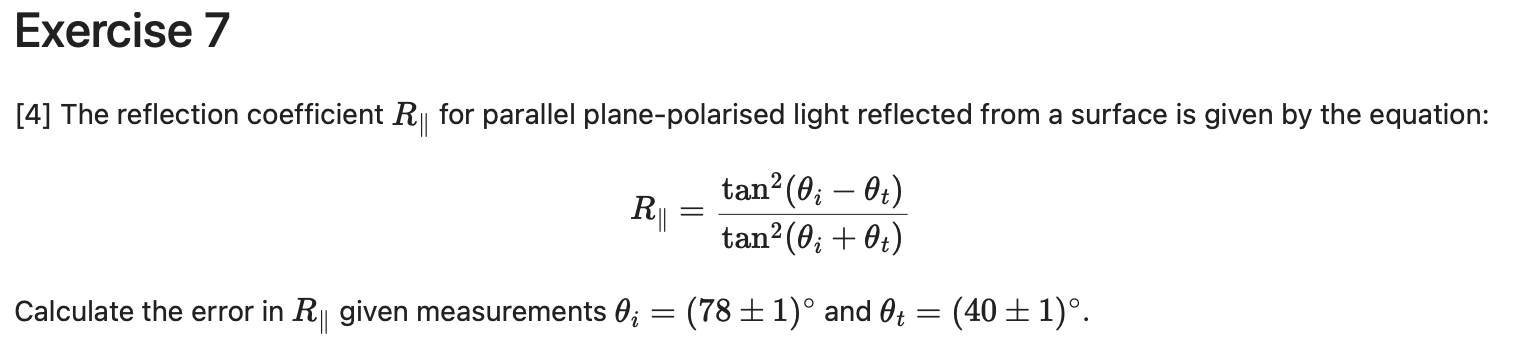

In [9]:
# 1. Define the variables in degrees
theta_i_deg = uc.ufloat(78, 1)
theta_t_deg = uc.ufloat(40, 1)

# 2. Convert to Radians
# For ufloat objects, we need to multiply by pi/180 instead of using np.radians()
pi = np.pi  # Get pi from numpy
theta_i = theta_i_deg * (pi / 180)
theta_t = theta_t_deg * (pi / 180)

# 3. Calculate R_parallel
# Formula: tan^2(diff) / tan^2(sum)
# Note: We use um.tan for the trig function
numerator = um.tan(theta_i - theta_t)**2
denominator = um.tan(theta_i + theta_t)**2

R_para = numerator / denominator

print(f"Reflection coefficient R_para: {R_para}")
print(f"Uncertainty: {R_para.s}")

Reflection coefficient R_para: 0.173+/-0.027
Uncertainty: 0.02703169311853785


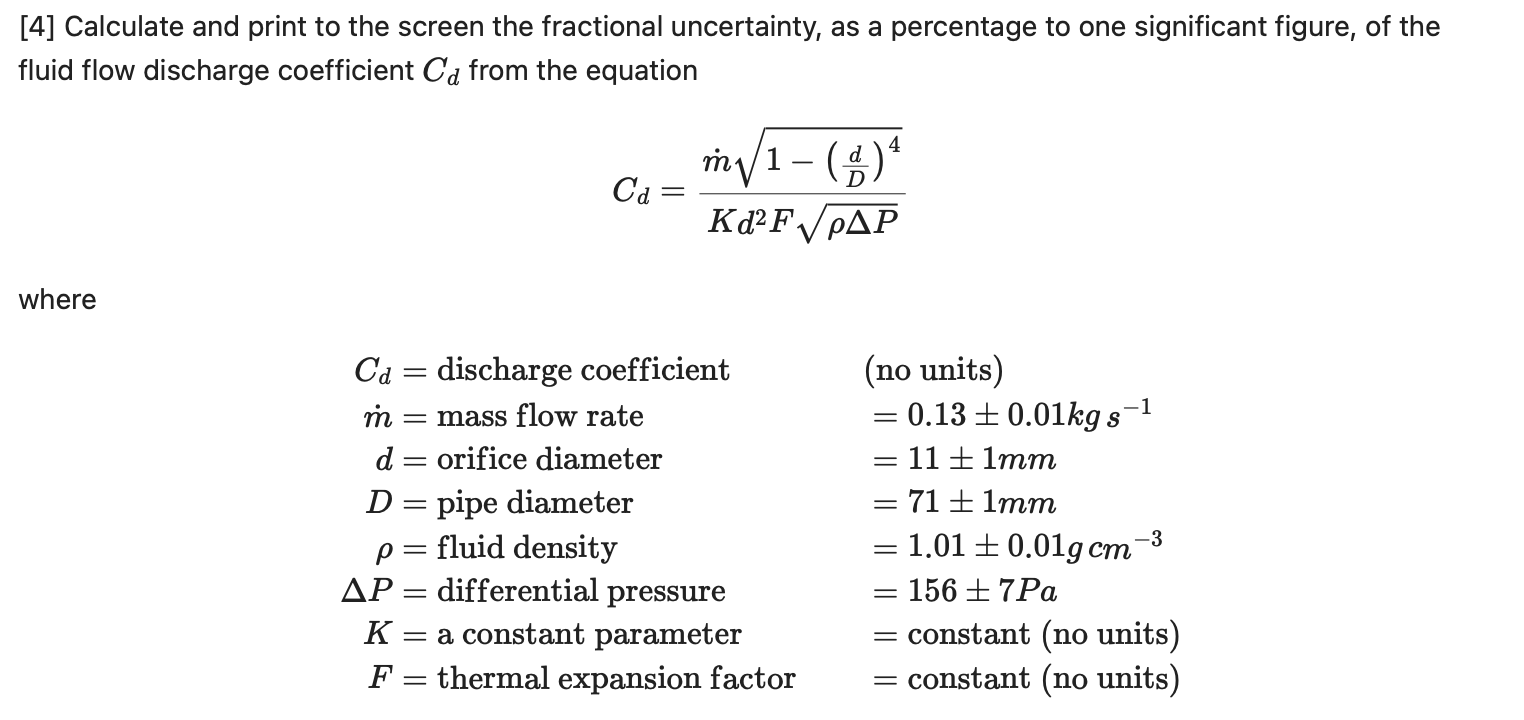

In [10]:
# 1. Define the variables with uncertainties
m_dot = uc.ufloat(0.13, 0.01)   # Mass flow rate
d = uc.ufloat(11, 1)            # Orifice diameter (mm)
D = uc.ufloat(71, 1)            # Pipe diameter (mm)
rho = uc.ufloat(1.01, 0.01)     # Fluid density
delta_P = uc.ufloat(156, 7)     # Differential pressure

# Constants (set to 1 as they don't affect fractional uncertainty)
K = 1
F = 1

# 2. Calculate the numerator and denominator separately for clarity
# Note: Use um.sqrt for square roots of uncertain numbers
numerator = m_dot * um.sqrt(1 - (d/D)**4)
denominator = K * (d**2) * F * um.sqrt(rho * delta_P)

# 3. Calculate Cd
Cd = numerator / denominator

# 4. Calculate Fractional Uncertainty
# The object Cd has attributes .s (standard deviation) and .n (nominal value)
frac_uncertainty = Cd.s / Cd.n

# 5. Print as a percentage to one significant figure
# The :.1g format specifier gives 1 significant figure
print(f"Fractional uncertainty: {frac_uncertainty:.1%}") 
# Alternatively, to be very explicit with sig figs on the percentage itself:
print(f"Percentage error: {frac_uncertainty * 100:.0f}%")

Fractional uncertainty: 19.9%
Percentage error: 20%


# UNCERTAINTIES GENERAL TIPS/CODE

**1. The "Golden Rules" Checklist**

Whenever you start a new uncertainty analysis script, check these three things:

Math Functions: Are you using um.sin(), um.sqrt(), um.log()? (Never use np.sin or math.sin on ufloats).

Angles: Did you convert degrees to radians? (The library always expects radians).

Repeated Variables: Did you define the variable once and reuse it? (e.g., t = ufloat(...), then use t twice in the formula. Do not write ufloat(...) twice for the same physical measurement).

**2. The Syntax Cheat Sheet**

Here is a template you can copy-paste for future assignments.

In [12]:
import numpy as np
import uncertainties as uc
import uncertainties.umath as um  # <--- CRITICAL for math operations

# --- A. Creating Numbers ---
# Format: uc.ufloat(nominal_value, std_dev)
x = uc.ufloat(10.5, 0.2)
y = uc.ufloat(5.0, 0.1)

# --- B. Basic Math ---
# The library handles error propagation (sum of squares) automatically
z = (x**2) / y 

# --- C. Accessing Results ---
print(f"Full result: {z}")        # Prints "22.05 +/- 0.96..."
print(f"Nominal value: {z.n}")    # Prints 22.05
print(f"Uncertainty:   {z.s}")    # Prints 0.963...

# --- D. Formatting for Reports ---
# Python's f-string formatting works great here.
# :.1u  -> 1 significant digit in uncertainty (standard convention)
# :.2u  -> 2 significant digits in uncertainty
print(f"Report format: {z:.1u}")  # Output: 22.0 +/- 1.0
print(f"Report format: {z:.2u}")  # Output: 22.05 +/- 0.96

Full result: 22.1+/-0.9
Nominal value: 22.05
Uncertainty:   0.9487259878384275
Report format: 22.1+/-0.9
Report format: 22.05+/-0.95


**3. A Reusable "Agreement Check" Function**

Since Exercise 4 required checking if two values agree, here is a function you can keep handy to do that automatically.

In [14]:
def check_agreement(val1, val2):
    """
    Checks if two ufloats agree and prints the sigma difference.
    Usage: check_agreement(n_jack, n_jill)
    """
    diff = val1 - val2
    sigma_diff = abs(diff.n) / diff.s
    
    print(f"Difference: {diff}")
    print(f"Sigma Discrepancy: {sigma_diff:.2f}σ")
    
    if sigma_diff < 1:
        print("-> Excellent agreement.")
    elif sigma_diff < 2:
        print("-> Reasonable agreement.")
    else:
        print("-> Disagreement (Significant difference).")

# Example usage next time:
# check_agreement(result_A, result_B)

**4. Pro Tip: Working with Arrays (unumpy)**

In future labs, you will likely have columns of data (e.g., 10 different voltage measurements) rather than single numbers. You don't need to write for loops! The library has a sub-module called unumpy that works just like NumPy arrays.

In [13]:
from uncertainties import unumpy as unp

# Create an array of measurements (e.g., from a CSV file)
values = unp.uarray([10.1, 12.2, 14.5], [0.1, 0.2, 0.1]) # [values], [errors]

# Calculate log of ALL values at once
log_values = unp.log(values)

print(log_values)

[2.312535423847214+/-0.009900990099009903
 2.501435951739211+/-0.01639344262295082
 2.6741486494265287+/-0.006896551724137931]


# Week 4: Curve fitting

## Exercise 1: Linear Fit with curve_fit

Goal: Repeat the linear fit from the introduction using curve_fit instead of the manual linfit function and verify the results match.

Explanation:

We define a linear function linear(x, m, c).

We use curve_fit to find the optimal slope (m) and intercept (c).

The curve_fit function returns popt (optimal parameters) and pcov (covariance matrix). The errors are the square roots of the diagonal elements of pcov.

In [ ]:
# --- Exercise 1 ---

# 1. Define the linear function for fitting
def linear(x, m, c):
    return m * x + c

# 2. Use the data provided in the notebook intro
x_data = np.array([ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0 ]) 
y_data = np.array([ 2, 104, 212, 302, 398, 507, 606, 692 ])

# 3. Perform the curve fit
# We don't necessarily need a guess for a simple linear fit, but it's good practice.
p_guess_linear = [100, 0] 
popt_lin, pcov_lin = curve_fit(linear, x_data, y_data, p0=p_guess_linear)

# 4. Extract parameters and errors
m_fit, c_fit = popt_lin
m_err, c_err = np.sqrt(np.diag(pcov_lin))

# 5. Print results to compare with the 'linfit' output from the intro
# (Intro gave: slope ~99.06 +/- 0.93, intercept ~6.17 +/- 3.89)
print(f"Slope:     {m_fit:.5f} +/- {m_err:.5f}")
print(f"Intercept: {c_fit:.5f} +/- {c_err:.5f}")

# 6. Plot to confirm visually
plt.figure()
plt.plot(x_data, y_data, 'r.', label='Data')
plt.plot(x_data, linear(x_data, *popt_lin), 'b-', label='curve_fit result')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exercise 1: Linear fit using curve_fit')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2: Fitting XRD Data

Goal: Analyze X-ray diffraction peaks by fitting Gaussian models with increasing complexity (backgrounds, double peaks).

Note on Imports: Since the file is a CSV, we typically use numpy or pandas to read it. I will use numpy as it was imported in your notebook header.

### Part 1: Read and Select Data

We need to isolate the region containing the Kβ (smaller, lower angle) and Kα (larger, higher angle) peaks. Molybdenum peaks typically appear around 6.3 
∘
  and 7.1 
∘
  for the first order.

In [ ]:
# --- Exercise 2, Part 1 ---

# Load the data (assuming the file is downloaded locally as per the !wget command)
# skiprows=1 ignores the header row 'angle,count'
data = np.loadtxt('XRD_data_Mo_anode.csv', delimiter=',', skiprows=1)
angles_full = data[:, 0]
counts_full = data[:, 1]

# Plot full data to identify the region by eye
plt.figure(figsize=(10, 4))
plt.plot(angles_full, counts_full, label='Raw Data')
plt.title('Full XRD Data')
plt.xlabel('Angle (degrees)')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

# Select data around the main peaks (roughly 6 to 7 degrees).
# Visually, a range of 5.5 to 8.5 degrees usually captures both peaks well.
mask = (angles_full >= 5.5) & (angles_full <= 8.5)
angles_select = angles_full[mask]
counts_select = counts_full[mask]

# Plot selected region
plt.figure()
plt.plot(angles_select, counts_select, 'k.', label='Selected Data')
plt.title('Selected Data (K-beta and K-alpha peaks)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()

### Part 2: Define Gaussian Function

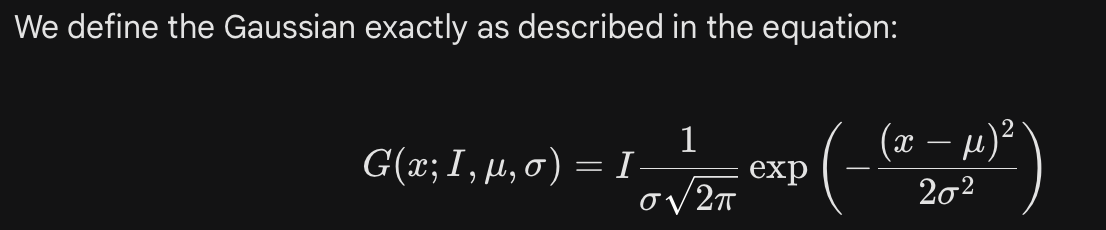

In [4]:
# --- Exercise 2, Part 2 ---

def Gau(x, intensity, mu, sigma):
    # Normalized Gaussian
    # intensity represents the Area under the curve
    norm = intensity / (sigma * np.sqrt(2 * np.pi))
    return norm * np.exp(-(x - mu)**2 / (2 * sigma**2))

### Part 3: Fit Highest Peak (Gaussian only)

The highest peak is the Kα peak on the right (approx 7.1 
∘
 ). Tip for Guesses:

mu: Look at the x-axis value of the peak tip (~7.1).

sigma: Estimate the half-width (~0.05 or 0.1).

intensity: Since the formula uses Area, Area≈Height×Width×2.5. If max height is ~3000, guess 3000×0.1×2.5≈750.

In [ ]:
# --- Exercise 2, Part 3 ---

# Initial guess for the highest peak (K-alpha)
# p0 = [intensity, mu, sigma]
p0_gau = [750, 7.1, 0.1]

# Fit
popt_gau, pcov_gau = curve_fit(Gau, angles_select, counts_select, p0=p0_gau)

# Plot
x_plot = np.linspace(min(angles_select), max(angles_select), 500)

plt.figure()
plt.plot(angles_select, counts_select, 'k.', label='Data')
plt.plot(x_plot, Gau(x_plot, *p0_gau), 'g--', label='Guess')
plt.plot(x_plot, Gau(x_plot, *popt_gau), 'r-', label='Fit (Gaussian only)')
plt.title('Fit: Single Gaussian (No background)')
plt.xlabel('Angle')
plt.legend()
plt.grid()
plt.show()

print("Single Gaussian Params:", popt_gau)

### Part 4: Fit with Constant Background

The previous fit likely failed to capture the tails because the data sits on a background of Bremsstrahlung radiation (it doesn't go to zero).

In [ ]:
# --- Exercise 2, Part 4 ---

def Gau_background(x, intensity, mu, sigma, bckg):
    return Gau(x, intensity, mu, sigma) + bckg

# Guess: Add a background value. Looking at the graph, the baseline is around 100-200.
p0_bg = [750, 7.1, 0.1, 200]

popt_bg, pcov_bg = curve_fit(Gau_background, angles_select, counts_select, p0=p0_bg)

plt.figure()
plt.plot(angles_select, counts_select, 'k.', label='Data')
plt.plot(x_plot, Gau_background(x_plot, *popt_bg), 'r-', label='Fit (Const BG)')
plt.title('Fit: Gaussian + Constant Background')
plt.legend()
plt.grid()
plt.show()

### Part 5: Fit with Linear Background

The background might be sloped. We replace bckg with m*x + c.

In [ ]:
# --- Exercise 2, Part 5 ---

def Gau_linear_bg(x, intensity, mu, sigma, m, c):
    # m is slope of background, c is intercept
    return Gau(x, intensity, mu, sigma) + (m * x + c)

# Guess: Slope might be negative (Bremsstrahlung decreases), intercept higher.
# Let's try slope -10, intercept 200.
p0_linbg = [750, 7.1, 0.1, -10, 300]

popt_linbg, pcov_linbg = curve_fit(Gau_linear_bg, angles_select, counts_select, p0=p0_linbg)

plt.figure()
plt.plot(angles_select, counts_select, 'k.', label='Data')
plt.plot(x_plot, Gau_linear_bg(x_plot, *popt_linbg), 'r-', label='Fit (Linear BG)')
plt.title('Fit: Gaussian + Linear Background')
plt.legend()
plt.grid()
plt.show()

### Part 6: Fit Two Peaks + Linear Background

Now we fit both the Kβ (left) and Kα (right) peaks simultaneously. Guesses:

We already have good values for Peak 2 (Kα) from the previous exercise.

Peak 1 (Kβ) is at ~6.3 
∘
 . It is roughly 1/3 the height of Peak 2.

In [ ]:
# --- Exercise 2, Part 6 ---

def Two_Gau_linear_bg(x, I1, mu1, sig1, I2, mu2, sig2, m, c):
    # Peak 1 (K-beta) + Peak 2 (K-alpha) + Linear Background
    g1 = Gau(x, I1, mu1, sig1)
    g2 = Gau(x, I2, mu2, sig2)
    bg = m * x + c
    return g1 + g2 + bg

# Guesses:
# Peak 1 (Left): I ~ 250, mu ~ 6.4, sig ~ 0.1
# Peak 2 (Right): I ~ 750, mu ~ 7.1, sig ~ 0.1
# Background: m ~ -20, c ~ 400
p0_double = [250, 6.4, 0.1, 750, 7.1, 0.1, -20, 400]

# Fit
popt_dbl, pcov_dbl = curve_fit(Two_Gau_linear_bg, angles_select, counts_select, p0=p0_double)

# Calculate errors
perr_dbl = np.sqrt(np.diag(pcov_dbl))

# Print final results with errors
print("--- Final Fit Results ---")
print(f"Peak 1 (K-beta)  : Pos = {popt_dbl[1]:.4f} +/- {perr_dbl[1]:.4f}, Area = {popt_dbl[0]:.1f}")
print(f"Peak 2 (K-alpha) : Pos = {popt_dbl[4]:.4f} +/- {perr_dbl[4]:.4f}, Area = {popt_dbl[3]:.1f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(angles_select, counts_select, 'k.', label='Data', alpha=0.5)
plt.plot(x_plot, Two_Gau_linear_bg(x_plot, *p0_double), 'g--', label='Guess', alpha=0.5)
plt.plot(x_plot, Two_Gau_linear_bg(x_plot, *popt_dbl), 'r-', label='Double Fit')
plt.title('Fit: Two Gaussians + Linear Background')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')
plt.legend()
plt.grid()
plt.show()

# Week 5: Further Curve Fitting

## Exercise 1: Curve Fitting with Noise

This exercise explores how to recover signal parameters from noisy data using curve_fit and how to estimate uncertainties.

### 1. Sinusoid Function

We define a sinusoidal function Asin(2πft+ϕ). We typically use 2*np.pi*f*t so that f represents frequency in Hertz (cycles per unit time), rather than angular frequency.

In [ ]:
# 1.1 Define sinusoid function and plot
def sinusoid(t, A, f, phi):
    """
    Returns a sinusoidal signal.
    t: array of time values
    A: amplitude
    f: frequency
    phi: phase
    """
    return A * np.sin(2 * np.pi * f * t + phi)

# Generate time array
t_array = np.linspace(0, 10, 100)

# Reference parameters
A_ref = 1.0
f_ref = 1.0
phi_ref = 0.0

# Generate reference signal
y_ref = sinusoid(t_array, A_ref, f_ref, phi_ref)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t_array, y_ref, label='Reference Signal')
plt.title('Sinusoid Signal (A=1, f=1, $\phi$=0)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### 2. Gaussian Noise Function

We create a function to generate random noise. Gaussian noise is standard for simulating detector noise.

In [ ]:
# 1.2 Noise generation function
def gen_noise(sigma, size_or_array):
    """
    Generates Gaussian noise centered at 0.
    sigma: standard deviation of the noise
    size_or_array: either an integer (number of points) or an array (to take shape from)
    """
    if isinstance(size_or_array, (np.ndarray, list)):
        n = len(size_or_array)
    else:
        n = int(size_or_array)
    
    return np.random.normal(0, sigma, n)

# Generate noise with sigma=1
noise_sample = gen_noise(1, t_array)

# Plot noise on top of signal
plt.figure(figsize=(10, 4))
plt.plot(t_array, y_ref, 'r-', label='Signal', alpha=0.7)
plt.plot(t_array, noise_sample, 'b.', label='Noise ($\sigma=1$)', alpha=0.3)
plt.title('Signal vs Unit Gaussian Noise')
plt.xlabel('Time')
plt.legend()
plt.show()

### 3. Data Generation Function

This combines the previous two functions to simulate "experimental" data.

In [ ]:
# 1.3 Combined data generation
def gen_data(t, signal, sigma_noise=1):
    """
    Returns signal + Gaussian noise.
    t: time array (needed for noise dimension)
    signal: the pure signal array
    sigma_noise: standard deviation of the noise
    """
    noise = gen_noise(sigma_noise, t)
    return signal + noise

# Plot a few realizations
plt.figure(figsize=(10, 4))
plt.plot(t_array, y_ref, 'k--', linewidth=2, label='True Signal')

for i in range(3):
    data = gen_data(t_array, y_ref, sigma_noise=1)
    plt.plot(t_array, data, '.', alpha=0.5, label=f'Realisation {i+1}')

plt.title('Simulated Noisy Data')
plt.legend()
plt.grid(True)
plt.show()

### 4. Fitting with curve_fit

Now we try to recover the parameters A,f,ϕ from the noisy data. Providing a decent initial guess (p0) is often crucial for periodic functions, as the fitter can get stuck in local minima (wrong phase or frequency).

In [ ]:
from scipy.optimize import curve_fit

# 1.4 Curve fitting
# Generate specific data instance
data_to_fit = gen_data(t_array, y_ref, sigma_noise=1)

# Define an "offset" guess (e.g., Amplitude 1.2, freq 1.1)
# This simulates not knowing the exact answer beforehand
guess_params = [1.2, 1.1, 0.5] 
y_guess = sinusoid(t_array, *guess_params)

# Perform fit
# p0 are the initial guess parameters
popt, pcov = curve_fit(sinusoid, t_array, data_to_fit, p0=guess_params)

# Generate fitted signal
y_fit = sinusoid(t_array, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_array, data_to_fit, 'k.', alpha=0.3, label='Noisy Data')
plt.plot(t_array, y_ref, 'g--', linewidth=2, label='True Signal')
plt.plot(t_array, y_guess, 'b:', label='Initial Guess')
plt.plot(t_array, y_fit, 'r-', label='Fitted Signal')
plt.title(f'Curve Fit Result\nRecovered: A={popt[0]:.2f}, f={popt[1]:.2f}, phi={popt[2]:.2f}')
plt.legend()
plt.grid(True)
plt.show()

print("Fitted parameters (A, f, phi):", popt)
print("Covariance matrix diagonal (variances):", np.diag(pcov))

### 5. Uncertainty Propagation

We use the uncertainties package to calculate a derived quantity Q=a/f 
2
 . This handles the correlation between a and f automatically using the covariance matrix (pcov) returned by curve_fit.

In [ ]:
# 1.5 Uncertainty propagation
try:
    import uncertainties
    from uncertainties import correlated_values
    
    # Create correlated uncertainty objects
    # popt contains [A, f, phi]
    # pcov is the covariance matrix
    params_with_error = correlated_values(popt, pcov)
    
    A_fit = params_with_error[0]
    f_fit = params_with_error[1]
    
    # Calculate derived quantity
    quantity = A_fit / (f_fit ** 2)
    
    print(f"A = {A_fit}")
    print(f"f = {f_fit}")
    print(f"Derived quantity a/f^2 = {quantity}")

except ImportError:
    print("The 'uncertainties' package is not installed. Please install it via 'pip install uncertainties' to run this cell.")

### 6. Animation of Degrading Signal

We animate the fit as the noise level (σ) increases. This visually demonstrates the "breaking point" where the fit fails to lock onto the correct frequency or phase.

In [ ]:
# 1.6 Animation of increasing noise
from matplotlib.animation import FuncAnimation
from IPython import display

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 10)
ax.set_ylim(-10, 10) # Set limits to accommodate larger noise

# Static elements
line_data, = ax.plot([], [], 'k.', alpha=0.3, label='Data')
line_fit, = ax.plot([], [], 'r-', linewidth=2, label='Fit')
line_ref, = ax.plot(t_array, y_ref, 'g--', alpha=0.5, label='Reference')
title_text = ax.text(0.5, 1.05, "", transform=ax.transAxes, ha="center")

ax.legend(loc='upper right')

def animate_noise(frame_num):
    # Increase sigma with frame number
    current_sigma = 0.1 + frame_num * 0.1
    
    # Generate new noisy data
    current_data = gen_data(t_array, y_ref, sigma_noise=current_sigma)
    
    # Fit (using the known truth as a guess to be fair, 
    # or use previous result to simulate tracking)
    try:
        popt_anim, _ = curve_fit(sinusoid, t_array, current_data, p0=[1, 1, 0])
        y_fit_anim = sinusoid(t_array, *popt_anim)
        line_fit.set_data(t_array, y_fit_anim)
    except:
        pass # If fit fails, just don't update line
        
    line_data.set_data(t_array, current_data)
    title_text.set_text(f"Sigma Noise = {current_sigma:.2f}")
    
    return line_data, line_fit, title_text

anim = FuncAnimation(fig, animate_noise, frames=50, interval=100, blit=True)

# Display animation
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

## Exercise 2: Complex Gravitational Waves

Gravitational waves are often represented as complex numbers where the real and imaginary parts correspond to the two polarizations, h 
+
​	
  and h 
×
​	
 .

### 1. Complex Time Series Function

We implement h(t)=Aexp(i(2πft+ϕ)).

In [ ]:
# 2.1 Complex wave function
def complex_wave(t, A, f, phi):
    # exp(ix) = cos(x) + i*sin(x)
    phase_term = 2 * np.pi * f * t + phi
    return A * np.exp(1j * phase_term)

### 2. 3D Plot

We plot the Real part vs Imaginary part vs Time. This forms a helix shape.

In [ ]:
# 2.2 3D Plot
from mpl_toolkits import mplot3d

# Parameters
A = 1
f = 1
phi = 0
t_3d = np.linspace(0, 2, 200) # shorter time for better visualization

h_val = complex_wave(t_3d, A, f, phi)
x_val = np.real(h_val) # h_plus
y_val = np.imag(h_val) # h_cross
z_val = t_3d

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot3D(x_val, y_val, z_val, 'blue')

ax.set_xlabel('Real(h)')
ax.set_ylabel('Imag(h)')
ax.set_zlabel('Time (t)')
ax.set_title('Complex Gravitational Wave Signal')
plt.show()

In [ ]:
### 3. 3D Animation (Varying Phase)

We animate the helix rotating by changing the phase ϕ.

In [ ]:
# 2.3 3D Animation
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

# Initial plot
line_3d, = ax.plot3D([], [], [], 'b-')

# Set axes limits
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(0, 2)
ax.set_xlabel('Real')
ax.set_ylabel('Imag')
ax.set_zlabel('Time')

def animate_phase(frame_num):
    # Vary phase
    phi_anim = frame_num / 10.0
    
    h_anim = complex_wave(t_3d, A, f, phi_anim)
    
    # Update data
    # Note: 3D plots require setting x and y, then setting 3d properties for z
    line_3d.set_data(np.real(h_anim), np.imag(h_anim))
    line_3d.set_3d_properties(t_3d)
    
    return line_3d,

anim_3d = FuncAnimation(fig, animate_phase, frames=63, interval=50, blit=True)

# Display animation
video_3d = anim_3d.to_html5_video()
html_3d = display.HTML(video_3d)
display.display(html_3d)
plt.close()

# Week 6: Monte Carlo integraction

## Exercise 1

Task: Plot histograms using uniform and normal distribution random number generators. Investigate how the histograms depend on the number of points taken.

Explanation: To solve this, we generate arrays of random numbers using numpy.random.random (for uniform distribution between 0 and 1) and numpy.random.normal (for Gaussian distribution). We do this for increasing values of N (e.g., 100, 1,000, 10,000, 100,000). We then plot histograms for each N. As N increases, the statistical noise decreases. The uniform distribution histogram looks more like a flat rectangle, and the normal distribution looks more like a smooth Bell curve.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, normal

# Define different values of N to investigate
N_values = [100, 1000, 10000, 100000]

# Create a figure for plotting
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle('Histograms of Random Distributions with increasing N')

# Loop through the values of N
for i, N in enumerate(N_values):
    # 1. Uniform Distribution
    # Generate N random numbers uniformly distributed between 0 and 1
    data_uniform = random(N)
    
    # Plot histogram on the top row
    axes[0, i].hist(data_uniform, bins='auto', density=True, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'Uniform, N={N}')
    axes[0, i].set_xlabel('Value')
    axes[0, i].set_ylabel('Probability Density')

    # 2. Normal Distribution
    # Generate N random numbers normally distributed (mean=0, sigma=1)
    data_normal = normal(loc=0.0, scale=1.0, size=N)
    
    # Plot histogram on the bottom row
    axes[1, i].hist(data_normal, bins='auto', density=True, color='salmon', edgecolor='black')
    axes[1, i].set_title(f'Normal, N={N}')
    axes[1, i].set_xlabel('Value')
    axes[1, i].set_ylabel('Probability Density')

plt.tight_layout()
plt.show()

## Exercise 2

Task: Find π using the Monte Carlo method (stones in a pond), plot the points, and compare the speed of looped vs. vectorized implementations.

Explanation: We simulate throwing darts at a 2×2 square centered at (0,0). The unit circle fits inside this square.

We generate x and y coordinates uniformly in the range [−1,1].

A point is inside the circle if x 
2
 +y 
2
 ≤1.

The ratio of the area of the circle (πr 
2
 =π) to the square (2×2=4) is π/4.

Therefore, π≈4× 
total points
points inside
​	
 .

For the speed comparison, we use the time module to measure how long the for loop takes versus the numpy vector operations.

In [ ]:
import time

# --- Part 1: Calculation and Plotting ---
N = 5000  # Number of points for the plot

# Generate random x and y coordinates between -1 and 1 using vectorized method
x = 2 * random(N) - 1
y = 2 * random(N) - 1

# Calculate radius squared for each point
r_squared = x**2 + y**2

# Boolean mask: True if inside the circle (r <= 1), False otherwise
in_circle = r_squared <= 1.0

# Estimate Pi
pi_estimate = 4 * np.sum(in_circle) / N
print(f"Estimated Pi with {N} points: {pi_estimate}")

# Plotting
plt.figure(figsize=(6, 6))
# Plot points inside the circle in blue
plt.plot(x[in_circle], y[in_circle], 'b.', markersize=2, label='Inside')
# Plot points outside the circle in green
plt.plot(x[~in_circle], y[~in_circle], 'g.', markersize=2, label='Outside')

plt.title(f'Monte Carlo estimation of $\\pi$ (N={N})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.axis('equal') # Ensure the circle doesn't look like an oval
plt.show()


# --- Part 2: Speed Comparison ---
N_speed = 1000000  # Use a larger N to make the time difference obvious

# Method A: For Loop
start_time = time.time()
count = 0
for i in range(N_speed):
    # random() gives [0, 1), so 2*random()-1 gives [-1, 1)
    xi = 2 * random() - 1
    yi = 2 * random() - 1
    if (xi**2 + yi**2) <= 1.0:
        count += 1
pi_loop = 4 * count / N_speed
end_time = time.time()
time_loop = end_time - start_time

# Method B: Vectorized
start_time = time.time()
xv = 2 * random(N_speed) - 1
yv = 2 * random(N_speed) - 1
rv_sq = xv**2 + yv**2
count_v = np.sum(rv_sq <= 1.0)
pi_vec = 4 * count_v / N_speed
end_time = time.time()
time_vec = end_time - start_time

print(f"\nSpeed Comparison for N={N_speed}:")
print(f"Loop method time:       {time_loop:.4f} seconds")
print(f"Vectorized method time: {time_vec:.4f} seconds")
print(f"Speedup factor:         {time_loop/time_vec:.2f}x faster")

## Exercise 3

Task: Integrate f(x)=sin(x)tan(x) between 0 and π/4. Compare with the exact answer and investigate convergence with increasing N.

Explanation:

The Integral: We want to compute I=∫ 
0
π/4
​	
 sin(x)tan(x)dx. The exact analytical solution is ln( 
2

​	
 +1)− 
2

​	
 
1
​	
 ≈0.1742668.

MC Method: To integrate ∫ 
a
b
​	
 f(x)dx, we generate N random numbers x 
i
​	
  uniformly distributed in [a,b]. The approximation is (b−a)× 
N
1
​	
 ∑f(x 
i
​	
 ). Essentially: (Length of interval) × (Average height of function).

Investigation: We calculate this integral for many different values of N (e.g., from 10 to 1,000,000) and plot the calculated value vs N. We expect the value to converge to the exact answer as N increases.

In [ ]:
# Define the function to integrate
def func(x):
    return np.sin(x) * np.tan(x)

# Integration limits
a = 0
b = np.pi / 4
exact_value = np.log(np.sqrt(2) + 1) - 1/np.sqrt(2) # Approx 0.17427

# Define a range of N values (logarithmically spaced to cover orders of magnitude)
# e.g., 10, ~14, ..., 1000000
N_counts = np.logspace(1, 6, 50).astype(int)

mc_results = []

# Loop over different values of N to investigate convergence
for N in N_counts:
    # 1. Generate N random x values within the interval [a, b]
    # random(N) gives [0, 1]. Scaling: a + (b-a) * random
    x_rand = a + (b - a) * random(N)
    
    # 2. Evaluate the function at these points (Vectorized)
    f_values = func(x_rand)
    
    # 3. Calculate the integral: (b-a) * mean(f(x))
    integral = (b - a) * np.mean(f_values)
    
    mc_results.append(integral)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(N_counts, mc_results, 'o-', label='Monte Carlo Estimate', markersize=4, alpha=0.6)
plt.axhline(y=exact_value, color='r', linestyle='--', label=f'Exact: {exact_value:.5f}')

plt.xscale('log') # Log scale for N to see the wide range
plt.xlabel('Number of Points N (log scale)')
plt.ylabel('Integral Result')
plt.title(r'Convergence of Monte Carlo Integration for $\int_0^{\pi/4} \sin(x)\tan(x) dx$')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

# Optional: Plotting the error
errors = np.abs(np.array(mc_results) - exact_value)
plt.figure(figsize=(10, 6))
plt.plot(N_counts, errors, 'r.-', alpha=0.6)
plt.plot(N_counts, 1/np.sqrt(N_counts), 'k:', label=r'$1/\sqrt{N}$ trend') # Expected error scaling
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Points N')
plt.ylabel('Absolute Error')
plt.title('Error Convergence')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

# Week 7: Random Walks

Setup and Helper Function

First, we need to ensure the walk function is correctly defined. The loop-based version provided in the notebook creates an array starting at 0. To make the vectorised version consistent (starting at 0), we need to adjust it slightly so that for steps points, it generates steps-1 moves.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

# Using a robust vectorised version that starts at 0
def walk(steps):
    """
    Returns a 1-D random walk vector of length 'steps'.
    Starts at 0.
    """
    # Create an array of zeros
    x = np.zeros(steps)
    # Generate steps-1 random moves of -1 or 1
    moves = np.random.choice([-1, 1], size=steps-1)
    # Calculate cumulative sum and assign to x starting from index 1
    x[1:] = np.cumsum(moves)
    return x

## Exercise 1

Explanation:

We run the walk function with 1000 steps and plot the result. The x-axis is the step number (time), and the y-axis is the position.

We use a for loop to repeat this process 100 times. plt.plot is called inside the loop, which automatically overlays the new lines on the same figure.

In [ ]:
# --- Exercise 1.1: Plot a single random walk ---
plt.figure(figsize=(10, 5))
steps = 1000
x = walk(steps)
time = np.arange(steps) # Array of step numbers 0 to 999

plt.plot(time, x)
plt.title("Single Random Walk (1000 steps)")
plt.xlabel("Step Number")
plt.ylabel("Position")
plt.grid(True)
plt.show()

# --- Exercise 1.2: Plot 100 random walks ---
plt.figure(figsize=(10, 5))

for i in range(100):
    x = walk(steps)
    plt.plot(time, x, alpha=0.5) # alpha makes lines semi-transparent

plt.title("100 Random Walks")
plt.xlabel("Step Number")
plt.ylabel("Position")
plt.grid(True)
plt.show()

## Exercise 2

Explanation: This exercise deals with ensemble statistics (statistics over many particles).

We create a 2D array particles of shape (steps, N). Each column represents one walker's trajectory.

We calculate the mean position by averaging across the rows (axis=1). For unbiased random walks, this should hover around 0.

We calculate the mean squared position (⟨x 
2
 ⟩) by squaring the positions first and then averaging across rows.

Observation: The mean squared position grows linearly with the number of steps (⟨x 
2
 ⟩∝t). This is the hallmark of diffusion.

In [ ]:
# --- Exercise 2 Setup ---
steps = 1000
N_small = 10
N_large = 500

# Function to generate the 2D array of walks
def generate_walks(steps, N):
    particles = np.zeros((steps, N))
    for i in range(N):
        particles[:, i] = walk(steps)
    return particles

# --- Exercise 2.1: Plot 10 walkers using 2D array ---
particles_small = generate_walks(steps, N_small)
time = np.arange(steps)

plt.figure(figsize=(10, 5))
plt.plot(time, particles_small)
plt.title("10 Random Walkers")
plt.xlabel("Step Number")
plt.ylabel("Position")
plt.grid(True)
plt.show()

# --- Exercise 2.2: Statistics for 500 walkers ---
particles_large = generate_walks(steps, N_large)

# Last step is at index -1
mean_pos_last = np.mean(particles_large[-1, :])
mean_sq_pos_last = np.mean(particles_large[-1, :]**2)

print(f"At the last step ({steps-1}):")
print(f"Mean Position: {mean_pos_last:.4f}")
print(f"Mean Squared Position: {mean_sq_pos_last:.4f}")

# --- Exercise 2.3 & 2.4: Mean and Mean Squared over time ---
# Calculate statistics for each step (across axis 1, which are the walkers)
mean_pos_all = np.mean(particles_large, axis=1)
mean_sq_pos_all = np.mean(particles_large**2, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Mean Position
ax1.plot(time, mean_pos_all)
ax1.set_title("Mean Position over Time")
ax1.set_xlabel("Step Number")
ax1.set_ylabel("<x>")
ax1.grid(True)
ax1.axhline(0, color='r', linestyle='--', label='Expected (0)') # Theoretical expectation
ax1.legend()

# Plot Mean Squared Position
ax2.plot(time, mean_sq_pos_all)
ax2.set_title("Mean Squared Position over Time")
ax2.set_xlabel("Step Number")
ax2.set_ylabel("<x^2>")
ax2.grid(True)

# Add a theoretical line y = x (since <x^2> ~ N_steps for random walk)
ax2.plot(time, time, 'r--', label='Theoretical (Linear)')
ax2.legend()

plt.show()

## Exercise 3

Explanation: The distribution of positions for a random walker typically approaches a Gaussian (Normal) distribution as the number of steps increases (Central Limit Theorem).

We slice the particles array at specific row indices (time steps) to get the positions of all 500 walkers at that moment.

We use plt.hist to visualize the distribution. As time (t) increases, the histogram should spread out (width ∝ sqrt(t)).

In [ ]:
# --- Exercise 3.1: Histogram at last step ---
plt.figure(figsize=(8, 5))
plt.hist(particles_large[-1, :], bins=30, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of Positions at Step {steps-1}")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

# --- Exercise 3.2: Histograms at intermediate steps ---
# Let's pick 3 steps: 200, 500, and 999
check_steps = [200, 500, 999]

plt.figure(figsize=(15, 5))

for i, step in enumerate(check_steps):
    plt.subplot(1, 3, i+1)
    # Extract positions at 'step'
    data = particles_large[step, :]
    
    plt.hist(data, bins=20, range=(-100, 100), edgecolor='black', alpha=0.7)
    plt.title(f"Step {step}")
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.ylim(0, 100) # Fixed y-limit to compare heights easily

plt.tight_layout()
plt.show()

# Week 8: Ordinary Differential Equations

## Setup
First, we need to define the euler function as provided in the notebook's introduction. This function implements the basic Euler method: x 
t+1
​	
 =x 
t
​	
 +f(x 
t
​	
 ,t)⋅dt.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f, x0, t):
    """
    Solves dx/dt = f(x, t) using Euler's method.
    f: function returning the derivative
    x0: initial condition
    t: array of time points
    """
    x = np.zeros(len(t))
    x[0] = x0
    dt = t[1] - t[0]  # Assuming uniform spacing
    for i in range(1, len(t)):
        x[i] = x[i-1] + f(x[i-1], t[i-1]) * dt
    return x

## Exercise 1: Radioactive Decay

Goal: Solve  
dt/
dN
​	
 =−λN and compare it to the exact solution N(t)=N 
0
​	
 e 
−λt
 .

Explanation:

Differential Equation: The rate of change is proportional to the current population. This is the definition of exponential decay.

Step Size (dt): Euler's method assumes the rate of change is constant during the time step. If dt is too large, this linear approximation drifts away from the true curve. By testing dt=1.0 vs dt=0.1, you will see that smaller steps track the exact solution much better.

In [ ]:
# --- Exercise 1 ---

# 1. Define the derivative function dN/dt
def decay_rate(N, t):
    lam = 1.0  # Decay constant lambda
    return -lam * N

# 2. Parameters
N0 = 1000
t_start = 0
t_end = 10

# 3. Solve with a large step size (dt = 1.0)
t_coarse = np.arange(t_start, t_end + 1, 1.0) # Steps: 0, 1, 2...
N_coarse = euler(decay_rate, N0, t_coarse)

# 4. Solve with a small step size (dt = 0.05)
t_fine = np.arange(t_start, t_end, 0.05)
N_fine = euler(decay_rate, N0, t_fine)

# 5. Exact solution for comparison
N_exact = N0 * np.exp(-1.0 * t_fine)

# 6. Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_fine, N_exact, 'k', label='Exact Solution', linewidth=1)
plt.plot(t_coarse, N_coarse, 'bo--', label='Euler (dt=1.0)')
plt.plot(t_fine, N_fine, 'r-', label='Euler (dt=0.05)')

plt.title("Radioactive Decay: Euler's Method Accuracy")
plt.xlabel("Time")
plt.ylabel("Number of Particles N")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2: Newton's Law of Cooling

Goal: Solve  
dt
dT
​	
 =−k(T−T 
env
​	
 ).

Explanation: This equation states that an object cools faster when it is much hotter than its environment. As T approaches T 
env
​	
 , the difference (T−T 
env
​	
 ) shrinks, so the cooling rate  
dt
dT
​	
 approaches zero.

In [ ]:
# --- Exercise 2 ---

# 1. Define the cooling derivative
def cooling_rate(T, t):
    k = 0.1          # Cooling constant
    T_env = 20.0     # Room temperature
    return -k * (T - T_env)

# 2. Parameters
T0 = 100.0   # Initial temperature (e.g., boiling water)
t_max = 100  # Duration
dt = 0.1     # Step size

# 3. Create time array and solve
t_cooling = np.arange(0, t_max, dt)
T_euler = euler(cooling_rate, T0, t_cooling)

# 4. Plot
plt.figure(figsize=(10, 6))
plt.plot(t_cooling, T_euler, label='Temperature')
plt.axhline(y=20, color='r', linestyle='--', label='Room Temp ($20^{\circ}C$)')

plt.title("Newton's Law of Cooling")
plt.xlabel("Time")
plt.ylabel("Temperature ($^{\circ}C$)")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 3: The Shooting Method (Particle in a Box)

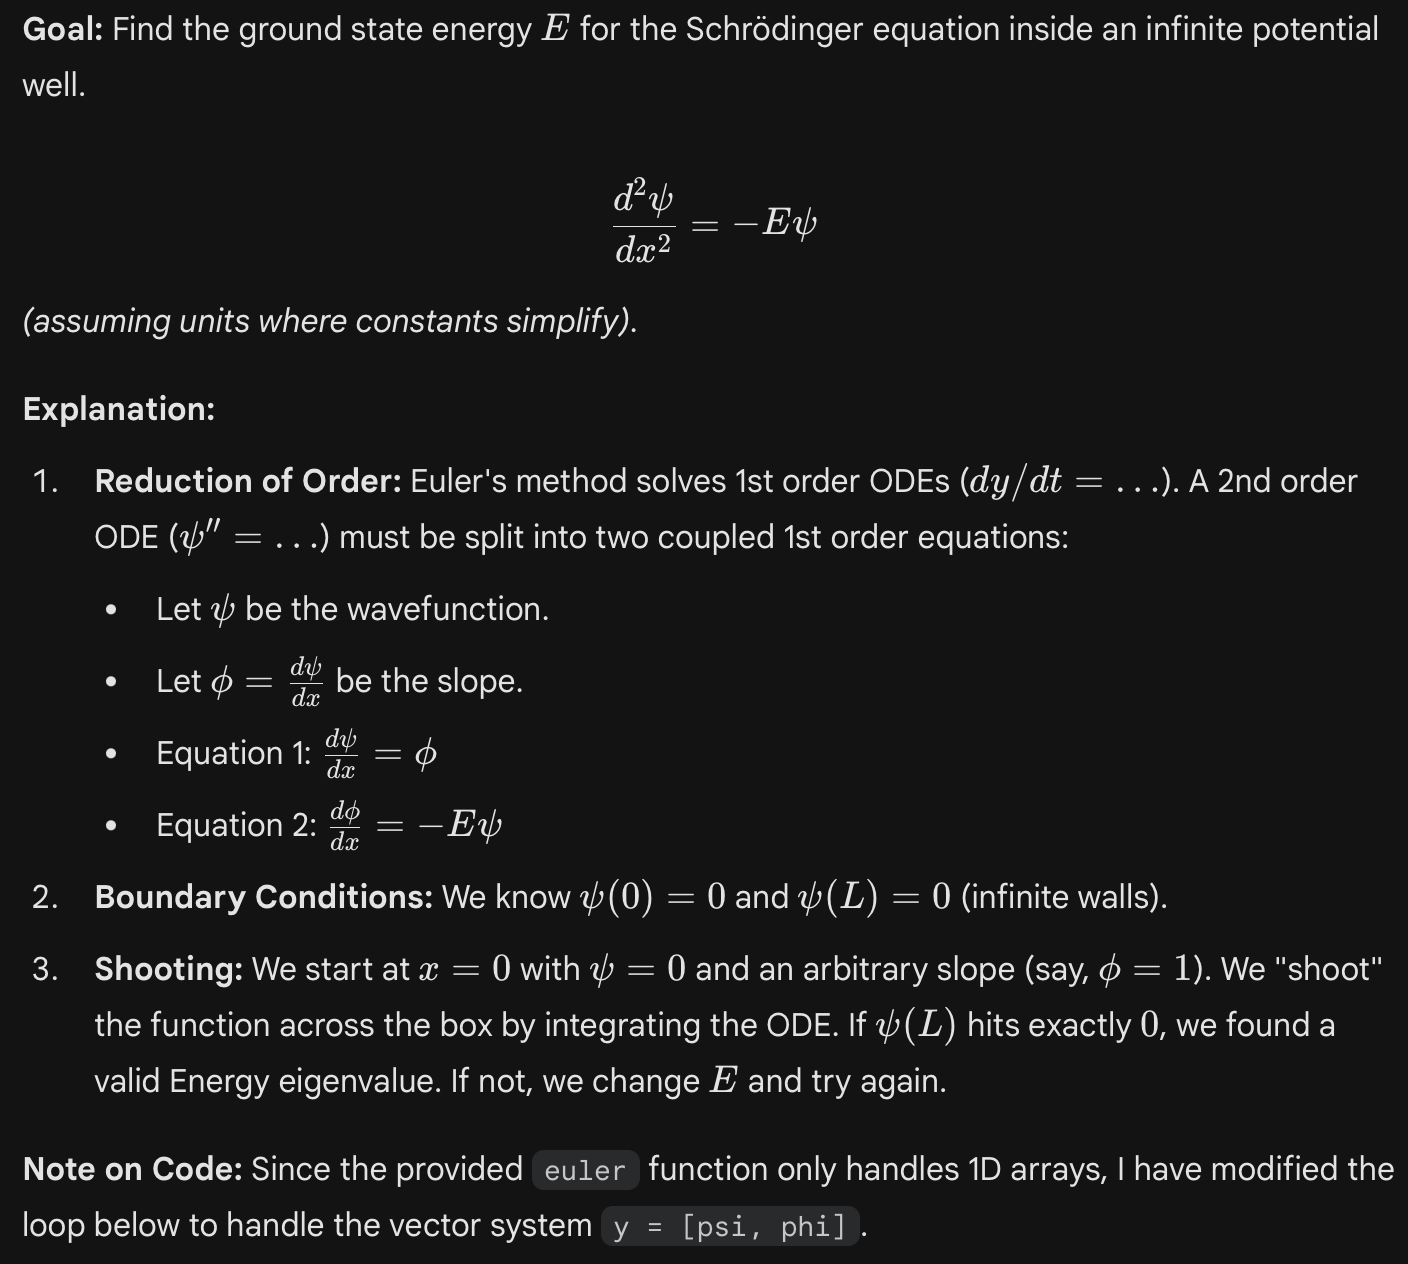

In [ ]:
# --- Exercise 3 ---

# 1. Define the vector derivative function
def schrodinger_derivs(state, x, E):
    """
    state is a vector: [psi, phi]
    Returns [dpsi/dx, dphi/dx]
    """
    psi = state[0]
    phi = state[1]
    
    dpsi_dx = phi
    dphi_dx = -E * psi  # Using simple units where k^2 = E
    
    return np.array([dpsi_dx, dphi_dx])

# 2. Solver function for a specific Energy E
def solve_schrodinger(E):
    L = 1.0
    dx = 0.01
    x_points = np.arange(0, L + dx, dx)
    
    # Initial conditions at x=0
    psi_0 = 0.0
    phi_0 = 1.0 # Arbitrary slope (normalization doesn't affect Energy)
    state = np.array([psi_0, phi_0])
    
    # Store results for plotting
    psi_values = [psi_0]
    
    # Custom Euler loop for vector system
    for i in range(1, len(x_points)):
        # Calculate derivative
        derivs = schrodinger_derivs(state, x_points[i-1], E)
        
        # Update state: new = old + slope * step
        state = state + derivs * dx
        
        psi_values.append(state[0])
        
    return x_points, np.array(psi_values)

# 3. "Shoot" with different Energies to find the ground state
# Theoretical ground state is E = pi^2 approx 9.87
energies_to_try = [5.0, 9.87, 15.0]

plt.figure(figsize=(10, 6))

for E in energies_to_try:
    x, psi = solve_schrodinger(E)
    # Check the final value at x=L (should be 0 for a valid eigenstate)
    final_val = psi[-1]
    label_txt = f'E = {E}, $\psi(L)={final_val:.2f}$'
    plt.plot(x, psi, label=label_txt)

plt.axhline(0, color='k', linewidth=1)
plt.axvline(1.0, color='k', linestyle='--', label='Wall (x=L)')
plt.title("Shooting Method: Finding the Ground State")
plt.xlabel("Position x")
plt.ylabel("Wavefunction $\psi(x)$")
plt.legend()
plt.grid(True)
plt.show()

# Week 9: Further ODE solvers

## Setup
First, we need to import the necessary libraries. This week introduces odeint from scipy.integrate, which is a powerful solver for Ordinary Differential Equations (ODEs).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Exercise 1: The Simple Pendulum

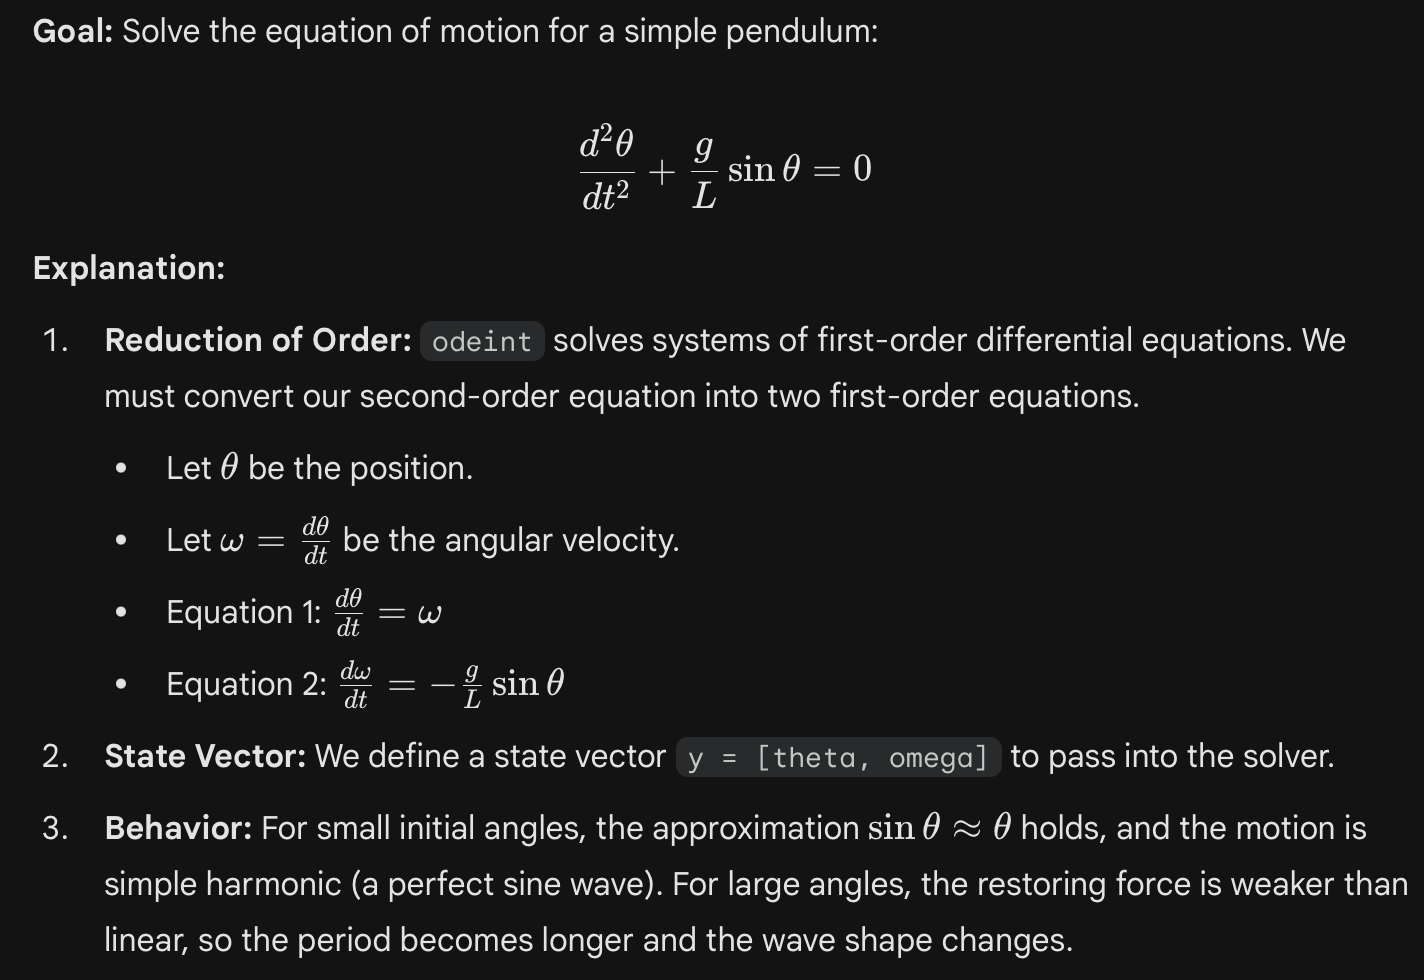

In [ ]:
# --- Exercise 1 ---

# 1. Define the system of 1st order ODEs
def simple_pendulum(state, t, g, L):
    """
    state = [theta, omega]
    Returns [dtheta/dt, domega/dt]
    """
    theta, omega = state
    
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta)
    
    return [dtheta_dt, domega_dt]

# 2. Parameters
g = 9.81
L = 1.0
params = (g, L)
t = np.linspace(0, 10, 250)

# 3. Solve for Small Angle (Linear regime)
# Initial conditions: theta = 0.1 rad (~5.7 deg), omega = 0
y0_small = [0.1, 0.0]
sol_small = odeint(simple_pendulum, y0_small, t, args=params)

# 4. Solve for Large Angle (Non-linear regime)
# Initial conditions: theta = 3.0 rad (~172 deg), omega = 0
y0_large = [3.0, 0.0]
sol_large = odeint(simple_pendulum, y0_large, t, args=params)

# 5. Plotting Position vs Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, sol_small[:, 0], label='Small Angle (0.1 rad)')
plt.plot(t, sol_large[:, 0], label='Large Angle (3.0 rad)')
plt.title("Pendulum Motion: $\\theta(t)$")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid(True)

# 6. Plotting Phase Space (Omega vs Theta)
# This shows the relationship between velocity and position
plt.subplot(1, 2, 2)
plt.plot(sol_small[:, 0], sol_small[:, 1], label='Small Angle')
plt.plot(sol_large[:, 0], sol_large[:, 1], label='Large Angle')
plt.title("Phase Space: $\\omega$ vs $\\theta$")
plt.xlabel("Angle $\\theta$ (rad)")
plt.ylabel("Angular Velocity $\\omega$ (rad/s)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Exercise 2: The Damped Driven Pendulum

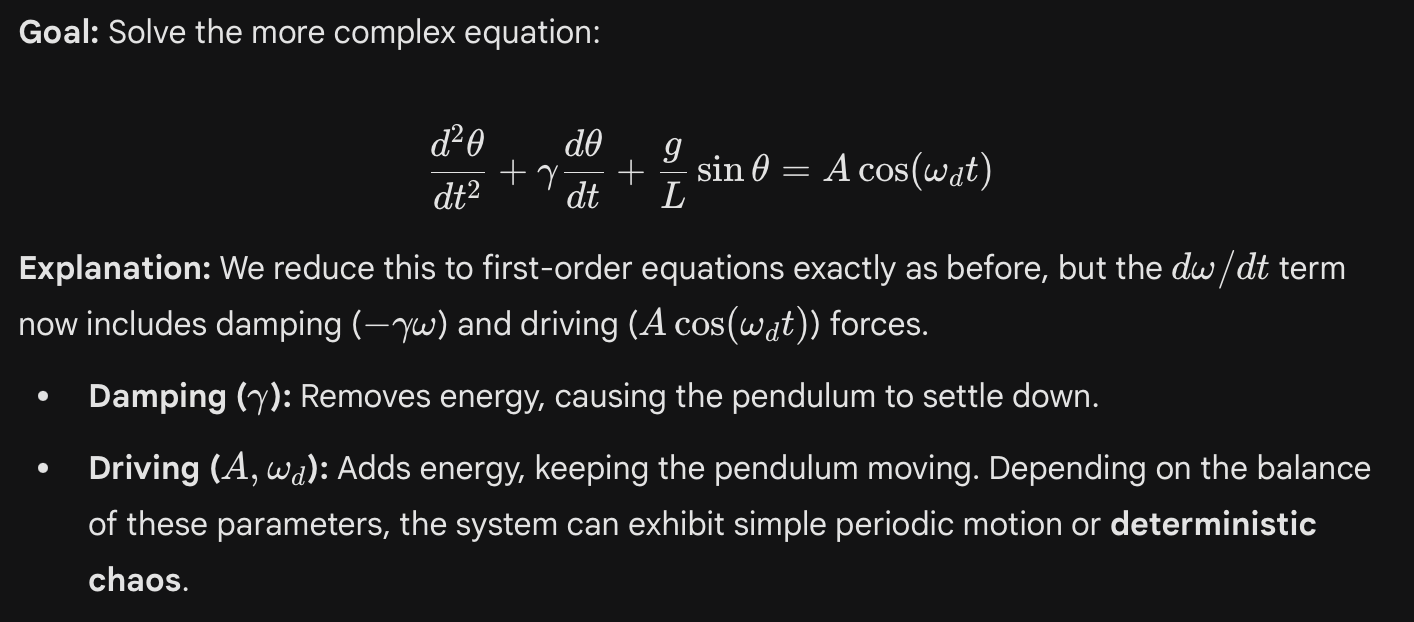

In [ ]:
# --- Exercise 2 ---

# 1. Define the Damped Driven system
def driven_pendulum(state, t, g, L, gamma, A, omega_d):
    theta, omega = state
    
    dtheta_dt = omega
    # Equation: theta'' = -gamma*theta' - (g/L)sin(theta) + A*cos(omega_d*t)
    domega_dt = -gamma * omega - (g/L) * np.sin(theta) + A * np.cos(omega_d * t)
    
    return [dtheta_dt, domega_dt]

# 2. Parameters for Chaos
# These specific values are known to produce chaotic behavior
g = 9.81
L = 9.81  # Makes natural frequency = 1 for simplicity
gamma = 0.5
A = 1.2
omega_d = 2.0 / 3.0

params_driven = (g, L, gamma, A, omega_d)
t_long = np.linspace(0, 100, 2000) # Longer time to see long-term behavior

# 3. Solve
y0 = [1.0, 0.0]
sol_driven = odeint(driven_pendulum, y0, t_long, args=params_driven)

# 4. Plotting
plt.figure(figsize=(12, 10))

# Time series
plt.subplot(2, 1, 1)
plt.plot(t_long, sol_driven[:, 0], 'b-', linewidth=0.8)
plt.title(f"Chaotic Pendulum: $\\theta(t)$ (A={A}, $\\gamma$={gamma})")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.grid(True)

# Phase Space
plt.subplot(2, 1, 2)
# We often restrict theta to [-pi, pi] for cleaner phase plots in chaos, 
# but raw plotting is also fine.
theta_wrapped = (sol_driven[:, 0] + np.pi) % (2 * np.pi) - np.pi

plt.plot(theta_wrapped, sol_driven[:, 1], 'r.', markersize=0.5)
plt.title("Phase Space (Strange Attractor structure)")
plt.xlabel("Angle $\\theta$ (wrapped to $-\\pi, \\pi$)")
plt.ylabel("Angular Velocity $\\omega$")
plt.grid(True)

plt.tight_layout()
plt.show()

# Week 10: Fourier Transform

## Setup
First, import the necessary libraries. The Fast Fourier Transform functions are located in numpy.fft

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure figures are reasonably sized
plt.rcParams['figure.figsize'] = (10, 6)

## Exercise 1: FFT of a Simple Signal

Goal: Generate a signal composed of two sine waves, compute its FFT, and visualize the frequency content.

Explanation:

Time Domain: We create a time array t and a signal y that is the sum of two sine waves with frequencies f 
1
​	
 =5 Hz and f 
2
​	
 =12 Hz.

Frequency Domain: We use np.fft.fft(y) to compute the discrete Fourier transform.

Frequency Axis: np.fft.fftfreq generates the corresponding frequency values for the x-axis. It takes the number of points N and the time step dt (or 1/f 
s
​	
 ).

Plotting: The output of the FFT is complex. To see the "strength" of each frequency, we plot the magnitude (np.abs).

In [ ]:
# --- Exercise 1 ---

# 1. Parameters
N = 1000          # Number of sample points
fs = 100.0        # Sampling frequency (Hz)
T = 1.0 / fs      # Sample spacing (s)
t = np.linspace(0.0, N*T, N, endpoint=False) # Time vector

# 2. Generate Signal (5 Hz and 12 Hz)
f1 = 5.0
f2 = 12.0
y = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# 3. Compute FFT
yf = np.fft.fft(y)
xf = np.fft.fftfreq(N, T) # Frequency axis

# 4. Plot
plt.figure(figsize=(12, 6))

# Time Domain Plot (Zoomed in to see the wave shape)
plt.subplot(2, 1, 1)
plt.plot(t[:100], y[:100], 'b-')
plt.title(f"Time Domain Signal: {f1}Hz + {f2}Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Frequency Domain Plot
plt.subplot(2, 1, 2)
# We usually only plot the positive frequencies (0 to fs/2)
# Mask to select positive frequencies
mask = xf >= 0
plt.plot(xf[mask], np.abs(yf[mask]) / (N/2), 'r-') 
# Note: Dividing by N/2 normalizes the amplitude to match the time domain sine waves
plt.title("Frequency Domain (FFT Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(0, 50) # Limit x-axis to relevant frequencies

plt.tight_layout()
plt.show()

## Exercise 2: Filtering in the Frequency Domain

Goal: Remove the 12 Hz component using the FFT, then reconstruct the signal.

Explanation:

Masking: We identify the indices in the frequency array corresponding to the "noise" (12 Hz) we want to remove.

Zeroing: We set the coefficients at those indices to zero. Crucial: You must zero out both the positive frequency (+12 Hz) and the negative frequency (−12 Hz) components. Using np.abs(xf) makes this easy.

Inverse FFT: We use np.fft.ifft to convert the modified spectrum back into a time-domain signal. The result can have tiny imaginary parts due to numerical error, so we take .real to plot it.

In [ ]:
# --- Exercise 2 ---

# 1. Create a filter mask
# We want to keep frequencies below 10 Hz and remove the 12 Hz component.
# This boolean mask is True for high frequencies we want to cut.
high_freq_indices = np.abs(xf) > 10

# 2. Apply filter
yf_filtered = yf.copy()
yf_filtered[high_freq_indices] = 0  # Zero out coefficients for |f| > 10 Hz

# 3. Inverse FFT
y_filtered = np.fft.ifft(yf_filtered)

# 4. Plot comparison
plt.figure(figsize=(10, 6))

# Plot original noisy signal
plt.plot(t[:200], y[:200], 'b-', alpha=0.5, label='Original (5Hz + 12Hz)')

# Plot filtered signal (taking real part)
plt.plot(t[:200], y_filtered[:200].real, 'r-', linewidth=2, label='Filtered (5Hz only)')

plt.title("Frequency Domain Filtering (Low Pass < 10Hz)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 3: Sunspot Cycles

Goal: Analyze historical sunspot data to find the period of the solar cycle.

Explanation:

Data: We assume you have a file (e.g., sunspots.txt) with two columns: Year and Sunspot Number.

FFT: We perform the FFT on the sunspot numbers.

Period: The x-axis comes out in Frequency (cycles/year). To interpret this physically, we convert the peak frequency f 
peak
​	
  to a period T=1/f 
peak
​	
 .

Result: You should find a dominant peak corresponding to a period of approximately 11 years, which is the well-known solar cycle.

##Exercise 3: Sunspot Cycles

Goal: Analyze historical sunspot data to find the period of the solar cycle.

Explanation:

Data: We assume you have a file (e.g., sunspots.txt) with two columns: Year and Sunspot Number.

FFT: We perform the FFT on the sunspot numbers.

Period: The x-axis comes out in Frequency (cycles/year). To interpret this physically, we convert the peak frequency f 
peak
​	
  to a period T=1/f 
peak
​	
 .

Result: You should find a dominant peak corresponding to a period of approximately 11 years, which is the well-known solar cycle.

In [ ]:
# --- Exercise 3 ---

# 1. Load Data
# We will check if the file exists, or generate dummy data if you don't have it.
import os

try:
    # Assuming standard format: Year, Number
    data = np.loadtxt('sunspots.txt')
    years = data[:, 0]
    spots = data[:, 1]
except OSError:
    print("Warning: 'sunspots.txt' not found. Generating dummy data for illustration.")
    years = np.arange(1700, 2020, 1)
    # Simulate 11-year cycle
    spots = 50 + 40*np.sin(2*np.pi*(years-1700)/11.0) + 10*np.random.randn(len(years))

# 2. Compute parameters
N_spots = len(spots)
# Assuming yearly data, the sampling interval is 1 year
T_sample = years[1] - years[0] 

# 3. Compute FFT
fft_spots = np.fft.fft(spots)
freqs_spots = np.fft.fftfreq(N_spots, d=T_sample)

# 4. Compute Power Spectrum (Magnitude Squared)
power = np.abs(fft_spots)**2

# 5. Plotting
plt.figure(figsize=(12, 5))

# Plot Time Series
plt.subplot(1, 2, 1)
plt.plot(years, spots)
plt.title("Sunspot Numbers over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)

# Plot Spectrum
plt.subplot(1, 2, 2)
# Filter for positive frequencies only and ignore the DC component (f=0)
mask = (freqs_spots > 0) 
plt.plot(freqs_spots[mask], power[mask])

plt.title("Power Spectrum of Sunspots")
plt.xlabel("Frequency (Cycles/Year)")
plt.ylabel("Power")
plt.xlim(0, 0.2) # Zoom in on low frequencies
plt.grid(True)

# 6. Identify the Peak
peak_idx = np.argmax(power[mask]) # Find index of max power in the masked array
peak_freq = freqs_spots[mask][peak_idx]
peak_period = 1.0 / peak_freq

print(f"Dominant Frequency: {peak_freq:.4f} cycles/year")
print(f"Dominant Period: {peak_period:.2f} years")

plt.show()